In [100]:
import pandas as pd
import numpy as np
import spacy
import nltk
import missingno
import re 
import matplotlib.pyplot as pyplot
from bs4 import BeautifulSoup 
import urllib.request
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
import en_core_web_sm as nlp
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matias.ortiz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [72]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [78]:
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

In [113]:
df1 = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')
df2= df1

•	Dataset review (descriptive)
first, I will look into the data and do an exploratory analysis to see how the data is behaving and the review and liked variables for my business case

In [18]:
df1.head(10)

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0
2      Cant say enough good things about this place.      1
3                       The ambiance was incredible.      1
4          The waitress and manager are so friendly.      1
5                  I would not recommend this place.      0
6         Overall I wasn't very impressed with Noca.      0
7                My gyro was basically lettuce only.      0
8                                  Terrible service!      0
9                           Thoroughly disappointed!      0

In [40]:
lik1 = df1.Liked
lik1.value_counts()

1    250
0    250
Name: Liked, dtype: int64

In [41]:
df1.describe()

Liked
count  500.000000
mean     0.500000
std      0.500501
min      0.000000
25%      0.000000
50%      0.500000
75%      1.000000
max      1.000000

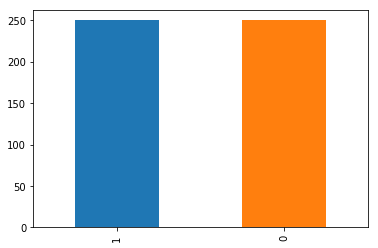

In [42]:
df3 = df1.Liked.value_counts()
df3.plot(kind="bar")

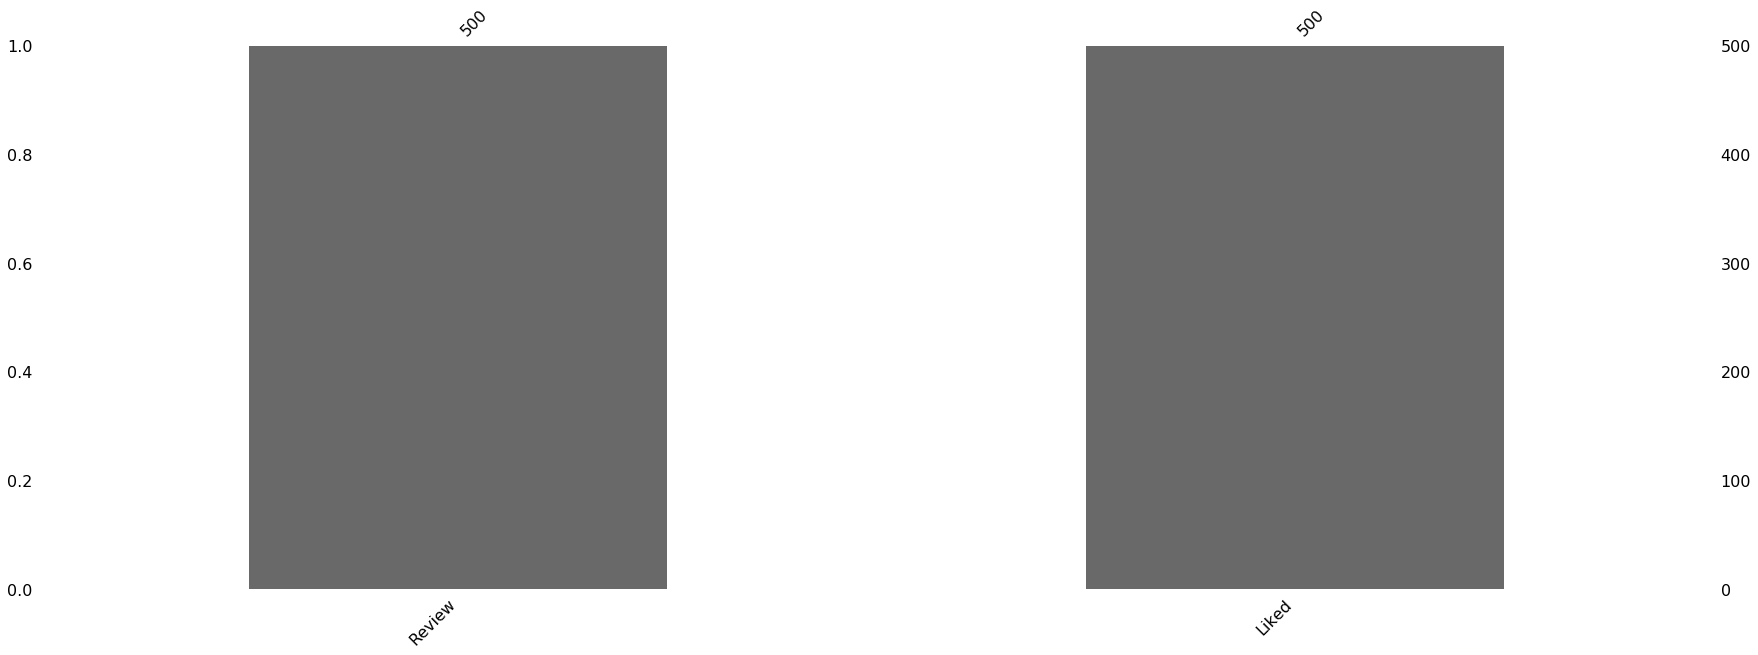

In [43]:
missingno.bar(df1, figsize = (30,10))

•	Pre-processing steps and methods.
Now, I will start processing the text to understand about the reviews and what the customers are reviewing from the restaurant. Transforming the data reviews into a scored values.

In [45]:
common=Counter(" ".join(df1["Review"]).split()).most_common(500)

In [48]:
display(common)

[('and', 181),
 ('the', 174),
 ('was', 143),
 ('I', 133),
 ('a', 112),
 ('to', 101),
 ('is', 74),
 ('The', 68),
 ('not', 58),
 ('of', 54),
 ('for', 53),
 ('in', 49),
 ('this', 44),
 ('with', 39),
 ('it', 39),
 ('be', 39),
 ('food', 39),
 ('place', 35),
 ('had', 33),
 ('were', 32),
 ('are', 31),
 ('you', 30),
 ('my', 29),
 ('so', 29),
 ('good', 28),
 ('very', 26),
 ('"The', 26),
 ('have', 25),
 ('at', 25),
 ('we', 24),
 ('on', 24),
 ('but', 23),
 ('here', 23),
 ('that', 22),
 ('"I', 21),
 ('great', 21),
 ('service', 21),
 ('they', 18),
 ('will', 17),
 ('We', 17),
 ('like', 16),
 ('as', 16),
 ('go', 15),
 ('back', 15),
 ('This', 15),
 ('really', 15),
 ('also', 14),
 ('your', 14),
 ('get', 13),
 ('nice', 13),
 ('time', 13),
 ('our', 13),
 ('would', 12),
 ('just', 12),
 ('even', 12),
 ('or', 12),
 ('an', 12),
 ("I'm", 12),
 ('from', 12),
 ('all', 12),
 ('their', 12),
 ("won't", 11),
 ('did', 11),
 ('out', 11),
 ('going', 11),
 ('been', 11),
 ('chicken', 11),
 ('eat', 10),
 ('place.', 10),


In [114]:
freq = nltk.FreqDist(df1['Review'])
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

"I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!":1
"I'd rather eat airline food, seriously.":1
Cant say enough good things about this place.:1
The ambiance was incredible.:1
The waitress and manager are so friendly.:1
I would not recommend this place.:2
Overall I wasn't very impressed with Noca.:1
My gyro was basically lettuce only.:1
Terrible service!:1
Thoroughly disappointed!:1
"I don't each much pasta, but I love the homemade /hand made pastas and thin pizzas here.":1
"Give it a try, you will be happy you did.":1
By far the BEST cheesecurds we have ever had!:1
Reasonably priced also!:1
Everything was perfect the night we were in.:1
The food is very good for your typical bar food.:1
it was a drive to get there.:1
"At first glance it is a lovely bakery cafe - nice ambiance, clean, friendly staff.":1
"Anyway, I do not think i will go back there.":1
"Point your finger at any item on the menu, order it and you wo

"Our waiter was very attentive, friendly, and informative.":1
Maybe if they weren't cold they would have been somewhat edible.:1
This place has a lot of promise but fails to deliver.:1
Very bad Experience!:1
What a mistake.:1
Food was average at best.:1
Great food.:1
We won't be going back anytime soon!:1
Very Very Disappointed ordered the $35 Big Bay Plater.:1
Great place to relax and have an awesome burger and beer.:1
It is PERFECT for a sit-down family meal or get together with a few friends.:1
"Not much flavor to them, and very poorly constructed.":1
The patio seating was very comfortable.:1
The fried rice was dry as well.:1
Hands down my favorite Italian bar!:1
"That just SCREAMS ""LEGIT"" in my book...somethat's also pretty rare here in Vegas.":1
It was just not a fun experience.:1
The atmosphere was great with a lovely duo of violinists playing songs we requested.:1
"I personally love the hummus, pita, baklava, falafels and Baba Ganoush (it's amazing what they do with eggplant!)

Join the club and get awesome offers via email.:1
"Perfect for someone (me) who only likes beer ice cold, or in this case, even colder.":1
Bland and flavorless is a good way of describing the barely tepid meat.:1
"The chains, which I'm no fan of, beat this place easily.":1
The nachos are a MUST HAVE!:1
We will not be coming back.:1
"I don't have very many words to say about this place, but it does everything pretty well.":1
"The staff is super nice and very quick even with the crazy crowds of the downtown juries, lawyers, and court staff.":1
"Great atmosphere, friendly and fast service.":1
When I received my Pita it was huge it did have a lot of meat in it so thumbs up there.:1
Once your food arrives it's meh.:1
Paying $7.85 for a hot dog and fries that looks like it came out of a kid's meal at the Wienerschnitzel is not my idea of a good meal.:1
The classic Maine Lobster Roll was fantastic.:1
"My brother in law who works at the mall ate here same day, and guess what he was sick all ni

"i felt insulted and disrespected, how could you talk and judge another human being like that?":1
"How can you call yourself a steakhouse if you can't properly cook a steak, I don't understand!":1
I'm not impressed with the concept or the food.:1
The only thing I wasn't too crazy about was their guacamole as I don't like it purÃ©ed.:1
"There is really nothing for me at postinos, hope your experience is better":1
I got food poisoning here at the buffet.:1
They brought a fresh batch of fries and I was thinking yay something warm but no!:1
"What SHOULD have been a hilarious, yummy Christmas Eve dinner to remember was the biggest fail of the entire trip for us.":1
"Needless to say, I won't be going back anytime soon.":1
This place is disgusting!:1
"Every time I eat here, I see caring teamwork to a professional degree.":1
The RI style calamari was a joke.:1
"However, there was so much garlic in the fondue, it was barely edible.":1
"I could barely stomach the meal, but didn't complain becaus

In [115]:
review= df1["Review"].str.split()
review.head()

0    ["I, also, had, to, taste, my, Mom's, multi-gr...
1     ["I'd, rather, eat, airline, food,, seriously."]
2    [Cant, say, enough, good, things, about, this,...
3                    [The, ambiance, was, incredible.]
4    [The, waitress, and, manager, are, so, friendly.]
Name: Review, dtype: object

In [116]:
print (list(reviews))

[['"i', 'also', 'had', 'to', 'taste', 'my', "mom's", 'multi-grain', 'pumpkin', 'pancakes', 'with', 'pecan', 'butter', 'and', 'they', 'were', 'amazing,', 'fluffy,', 'and', 'delicious!"'], ['"i\'d', 'rather', 'eat', 'airline', 'food,', 'seriously."'], ['cant', 'say', 'enough', 'good', 'things', 'about', 'this', 'place.'], ['the', 'ambiance', 'was', 'incredible.'], ['the', 'waitress', 'and', 'manager', 'are', 'so', 'friendly.'], ['i', 'would', 'not', 'recommend', 'this', 'place.'], ['overall', 'i', "wasn't", 'very', 'impressed', 'with', 'noca.'], ['my', 'gyro', 'was', 'basically', 'lettuce', 'only.'], ['terrible', 'service!'], ['thoroughly', 'disappointed!'], ['"i', "don't", 'each', 'much', 'pasta,', 'but', 'i', 'love', 'the', 'homemade', '/hand', 'made', 'pastas', 'and', 'thin', 'pizzas', 'here."'], ['"give', 'it', 'a', 'try,', 'you', 'will', 'be', 'happy', 'you', 'did."'], ['by', 'far', 'the', 'best', 'cheesecurds', 'we', 'have', 'ever', 'had!'], ['reasonably', 'priced', 'also!'], ['eve

In [117]:
df2["Review"] = df1["Review"].str.lower()
df2["Review"]

0      "i also had to taste my mom's multi-grain pump...
1              "i'd rather eat airline food, seriously."
2          cant say enough good things about this place.
3                           the ambiance was incredible.
4              the waitress and manager are so friendly.
5                      i would not recommend this place.
6             overall i wasn't very impressed with noca.
7                    my gyro was basically lettuce only.
8                                      terrible service!
9                               thoroughly disappointed!
10     "i don't each much pasta, but i love the homem...
11           "give it a try, you will be happy you did."
12         by far the best cheesecurds we have ever had!
13                               reasonably priced also!
14          everything was perfect the night we were in.
15      the food is very good for your typical bar food.
16                          it was a drive to get there.
17     "at first glance it is a

In [118]:
print (nltk.word_tokenize(df1["Review"]))

TypeError: expected string or bytes-like object

In [ ]:
txt = df1.Review.apply(word_tokenize)
txt.head()

•	Main objective: 
The objective of my study is to analyze the reviews about the restaurant from the customers, and advice which type of products and services the customers are talking about by delivering a report. towards to detect things that lead people writing positive or negative reviews, is those ones are related with the service, place, product, time of attention or just about a mixture, so then, I will be able to classify new upcoming reviews with my model based on certain words, and my client will improved his service with this model.

•	The feature engineering process (techniques used, commented).
Lower case for the values
everyone is in the same format
get value to each word
the lemmanzzitte the words into closer words
categorice the words and provide a frequency table to know what the customer are talking about in the reviews

In [ ]:
nltk.download('stopwords')

•	Model selection 
process (parameters, candidates, selected (why?) and evaluated metrics).
I have three possible models, with (10%,20%,30% trainning data sets to compare the values with the data) 

In [51]:
corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', df1['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [52]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = df1.iloc[:, 1].values #Defining our response variable

In [53]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)



[[27 23]
 [ 6 44]]
[[35 15]
 [15 35]]


In [54]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)



No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.710
Logistic: ROC AUC=0.768


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.88  0.46
2        0.0  1.00  1.00

threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00

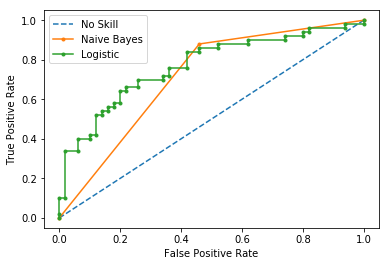

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.86
LR Specificity: 0.54
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.7
LR Specificity: 0.74
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.4
LR Specificity: 0.9
NB Sensitivity: 0.88
NB Specificity: 0.54


In [55]:
# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

In [56]:
cv2 = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X2 = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y2 = df1.iloc[:, 1].values #Defining our response variable

In [57]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.10, random_state = 0)

# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb2 = GaussianNB()
classifier_nb2.fit(X2_train, y2_train)

# fit a Logistic Regression Model
classifier_lr2 = LogisticRegression(solver='lbfgs')
classifier_lr2.fit(X2_train, y2_train)

# Predicting the Test set results
nb_y_pred2 = classifier_nb2.predict(X2_test)
lr_y_pred2 = classifier_lr2.predict(X2_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm2 = confusion_matrix(y2_test, nb_y_pred2)
print(nb_cm2)
lr_cm2 = confusion_matrix(y2_test, lr_y_pred2)
print(lr_cm2)

[[ 8 13]
 [ 7 22]]
[[18  3]
 [11 18]]


In [58]:
# predict probabilities
nb_probs2 = classifier_nb.predict_proba(X2_test)
lr_probs2 = classifier_lr.predict_proba(X2_test)

# keep probabilities for the positive outcome only
ns_probs2 = [0 for _ in range(len(y2_test))]
nb_probs2 = nb_probs2[:, 1]
lr_probs2 = lr_probs2[:, 1]

# calculate scores
ns_auc2 = roc_auc_score(y2_test, ns_probs2)
nb_auc2 = roc_auc_score(y2_test, nb_probs2)
lr_auc2 = roc_auc_score(y2_test, lr_probs2)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc2))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc2))
print('Logistic: ROC AUC=%.3f' % (lr_auc2))

# calculate roc curves
ns_fpr2, ns_tpr2, ns_thresholds2  = roc_curve(y2_test, ns_probs2)
nb_fpr2, nb_tpr2, nb_thresholds2  = roc_curve(y2_test, nb_probs2)
lr_fpr2, lr_tpr2, lr_thresholds2  = roc_curve(y2_test, lr_probs2)

#get roc curve metrics
from IPython.display import display

ns_df2 = pd.DataFrame(data=[])
ns_df2['threshold'] = ns_thresholds2
ns_df2['tpr'] = ns_tpr2
ns_df2['fpr'] = ns_fpr2
display(ns_df2)

nb_df2 = pd.DataFrame(data=[])
nb_df2['threshold'] = nb_thresholds2
nb_df2['tpr'] = nb_tpr2
nb_df2['fpr'] = nb_fpr2
display(nb_df2)

lr_df2 = pd.DataFrame(data=[])
lr_df2['threshold'] = lr_thresholds2
lr_df2['tpr'] = lr_tpr2
lr_df2['fpr'] = lr_fpr2
display(lr_df2)


No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.717
Logistic: ROC AUC=0.803


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold       tpr       fpr
0        2.0  0.000000  0.000000
1        1.0  0.862069  0.428571
2        0.0  1.000000  1.000000

threshold       tpr       fpr
0    1.999911  0.000000  0.000000
1    0.999911  0.034483  0.000000
2    0.702609  0.482759  0.000000
3    0.697616  0.482759  0.047619
4    0.681008  0.517241  0.047619
5    0.676496  0.517241  0.095238
6    0.640720  0.586207  0.095238
7    0.634032  0.586207  0.142857
8    0.528340  0.620690  0.142857
9    0.488497  0.620690  0.190476
10   0.452494  0.724138  0.190476
11   0.428239  0.724138  0.333333
12   0.381492  0.862069  0.333333
13   0.266787  0.862069  0.666667
14   0.261844  0.896552  0.666667
15   0.253786  0.896552  0.761905
16   0.238886  0.931034  0.761905
17   0.155739  0.931034  1.000000
18   0.049517  1.000000  1.000000

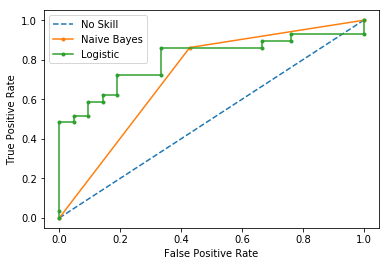

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.86
LR Specificity: 0.54
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.7
LR Specificity: 0.74
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.4
LR Specificity: 0.9
NB Sensitivity: 0.88
NB Specificity: 0.54


In [59]:
# plot the roc curve for the model

fig, ax2 = pyplot.subplots()

ax2.plot(ns_fpr2, ns_tpr2, linestyle='--', label='No Skill')
ax2.plot(nb_fpr2, nb_tpr2, marker='.', label='Naive Bayes')
ax2.plot(lr_fpr2, lr_tpr2, marker='.', label='Logistic')

# axis labels
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

In [60]:
cv3 = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X3 = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y3 = df1.iloc[:, 1].values #Defining our response variable

In [61]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.30, random_state = 0)

# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb3 = GaussianNB()
classifier_nb3.fit(X3_train, y3_train)

# fit a Logistic Regression Model
classifier_lr3 = LogisticRegression(solver='lbfgs')
classifier_lr3.fit(X3_train, y3_train)

# Predicting the Test set results
nb_y_pred3 = classifier_nb3.predict(X3_test)
lr_y_pred3 = classifier_lr3.predict(X3_test)

# Making the Confusion Matrix
nb_cm3 = confusion_matrix(y3_test, nb_y_pred3)
print(nb_cm3)
lr_cm3 = confusion_matrix(y3_test, lr_y_pred3)
print(lr_cm3)

[[48 32]
 [12 58]]
[[55 25]
 [20 50]]


In [62]:
# predict probabilities
nb_probs3 = classifier_nb.predict_proba(X3_test)
lr_probs3 = classifier_lr.predict_proba(X3_test)

# keep probabilities for the positive outcome only
ns_probs3 = [0 for _ in range(len(y3_test))]
nb_probs3 = nb_probs3[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate scores
ns_auc3 = roc_auc_score(y3_test, ns_probs3)
nb_auc3 = roc_auc_score(y3_test, nb_probs3)
lr_auc3 = roc_auc_score(y3_test, lr_probs3)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc3))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc3))
print('Logistic: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr3, ns_tpr3, ns_thresholds3  = roc_curve(y3_test, ns_probs3)
nb_fpr3, nb_tpr3, nb_thresholds3  = roc_curve(y3_test, nb_probs3)
lr_fpr3, lr_tpr3, lr_thresholds3  = roc_curve(y3_test, lr_probs3)

#get roc curve metrics
from IPython.display import display

ns_df3 = pd.DataFrame(data=[])
ns_df3['threshold'] = ns_thresholds3
ns_df3['tpr'] = ns_tpr3
ns_df3['fpr'] = ns_fpr3
display(ns_df3)

nb_df3 = pd.DataFrame(data=[])
nb_df3['threshold'] = nb_thresholds3
nb_df3['tpr'] = nb_tpr3
nb_df3['fpr'] = nb_fpr3
display(nb_df3)

lr_df3 = pd.DataFrame(data=[])
lr_df3['threshold'] = lr_thresholds3
lr_df3['tpr'] = lr_tpr3
lr_df3['fpr'] = lr_fpr3
display(lr_df3)

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.807
Logistic: ROC AUC=0.862


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold       tpr     fpr
0        2.0  0.000000  0.0000
1        1.0  0.914286  0.3000
2        1.0  0.914286  0.3125
3        0.0  1.000000  1.0000

threshold       tpr     fpr
0    1.999911  0.000000  0.0000
1    0.999911  0.014286  0.0000
2    0.963908  0.071429  0.0000
3    0.952055  0.071429  0.0125
4    0.808690  0.400000  0.0125
5    0.794672  0.400000  0.0375
6    0.768191  0.457143  0.0375
7    0.765730  0.457143  0.0500
8    0.754470  0.471429  0.0500
9    0.751255  0.471429  0.0625
10   0.735760  0.500000  0.0625
11   0.733391  0.500000  0.0750
12   0.702609  0.571429  0.0750
13   0.697616  0.571429  0.0875
14   0.681008  0.585714  0.0875
15   0.676496  0.585714  0.1000
16   0.674784  0.600000  0.1000
17   0.663734  0.600000  0.1125
18   0.640720  0.642857  0.1125
19   0.634032  0.642857  0.1250
20   0.577694  0.728571  0.1250
21   0.567556  0.728571  0.1375
22   0.554834  0.742857  0.1375
23   0.544225  0.742857  0.1625
24   0.526270  0.771429  0.1625
25   0.501151  0.771429  0.1875
26   0.490631  0.785714  0.1875
27   0.477539  0.785714  0.2250
28   0.470072  0.800000  0.2250
29   0.466426  0.800000  0.2375
30   0.452494  0.828571  0.2375
31   0.422411  0.828571  0.2875
32   0.392767  0.885714  0.2875
33   0.381911  0.885714  0.3125
34   0.381492  0.900000  0.3125
35   0.350426  0.900000  0.3500
36   0.348744  0.914286  0.3500
37   0.320811  0.914286  0.4125
38   0.315424  0.928571  0.4125
39   0.263001  0.928571  0.5750
40   0.261844  0.942857  0.5750
41   0.245975  0.942857  0.6375
42   0.238886  0.957143  0.6375
43   0.211520  0.957143  0.6875
44   0.211244  0.971429  0.6875
45   0.138768  0.971429  0.9375
46   0.137476  0.985714  0.9375
47   0.088363  0.985714  1.0000
48   0.049517  1.000000  1.0000

In [63]:
# plot the roc curve for the model

fig, ax3 = pyplot.subplots()

ax3.plot(ns_fpr3, ns_tpr3, linestyle='--', label='No Skill')
ax3.plot(nb_fpr3, nb_tpr3, marker='.', label='Naive Bayes')
ax3.plot(lr_fpr3, lr_tpr3, marker='.', label='Logistic')

# axis labels
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.86
LR Specificity: 0.54
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.7
LR Specificity: 0.74
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.4
LR Specificity: 0.9
NB Sensitivity: 0.88
NB Specificity: 0.54


•	Model selection 
Looking into the three possible models, in the first case i will want to use the valuse from the right side prioritaizing the sensitivity (the true positive rate looking for no false positive) rather than the specificity looking for no false negativ, I can analyze for this graph that i would want to find values from my reviews in that range to support the idea that those values will explain better the future reviews and will be able to clasify them.  

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.710
Logistic: ROC AUC=0.768


Final Advice

I would strongly recomend first look into the words, relashionship between them and then start analyzing what the people are saying, Then create different categories for the reviews and start looking the models, then  